In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv(r"D:\Ultimate Programming\Machine Learning Project\Twitter Sentiment Analysis Project\Twitter\twitter_training.csv")
val_data = pd.read_csv(r"D:\Ultimate Programming\Machine Learning Project\Twitter Sentiment Analysis Project\Twitter\twitter_validation.csv")
col = ['tweet_id', 'entity','sentiment','description']
train_data.columns = col
val_data.columns = col

In [3]:
train_data.head(4)

,tweet_id,entity,sentiment,description
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# **Data Cleaining**

In [4]:
train_data.isnull().sum()

tweet_id         0
entity           0
sentiment        0
description    686
dtype: int64

In [5]:
train_data.dropna(inplace=True)
val_data.dropna(inplace=True)

In [6]:
train_data.duplicated().sum()

np.int64(2340)

In [7]:
train_data.drop_duplicates(inplace=True)
val_data.drop_duplicates(inplace=True)

In [8]:
train_data.shape

(71655, 4)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     71655 non-null  int64 
 1   entity       71655 non-null  object
 2   sentiment    71655 non-null  object
 3   description  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [10]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     999 non-null    int64 
 1   entity       999 non-null    object
 2   sentiment    999 non-null    object
 3   description  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


# **EDA Exploratory Data Analysis** 

In [11]:
train_data['sentiment'].value_counts().reset_index()

,sentiment,count
0,Negative,21698
1,Positive,19712
2,Neutral,17708
3,Irrelevant,12537


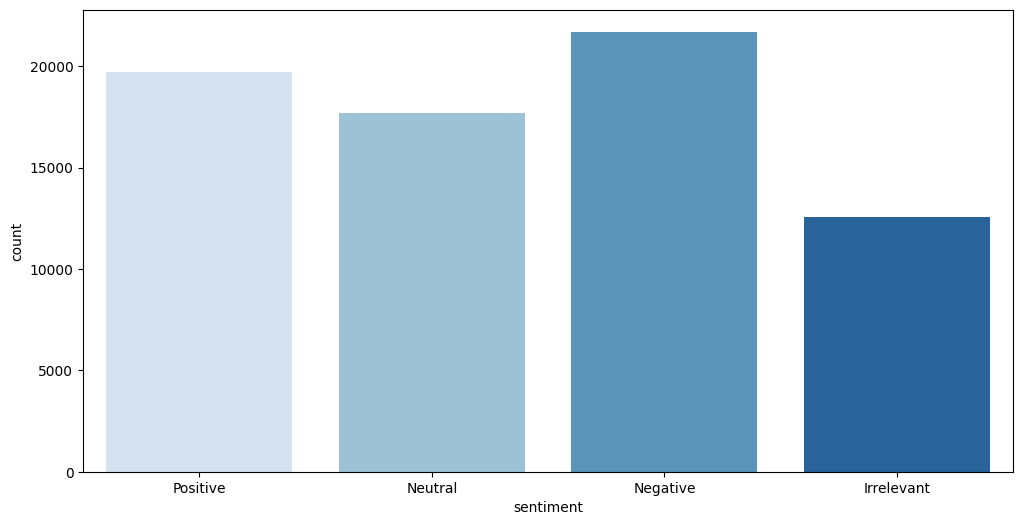

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_data, x='sentiment', palette='Blues')
plt.show()

In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\iamaf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
train_data['num_char'] = train_data['description'].apply(len)

In [15]:
train_data['num_word'] = train_data['description'].apply(lambda x : len(nltk.word_tokenize(x)))

In [16]:
train_data['num_sent'] = train_data['description'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [17]:
train_data.head(2)

,tweet_id,entity,sentiment,description,num_char,num_word,num_sent
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1


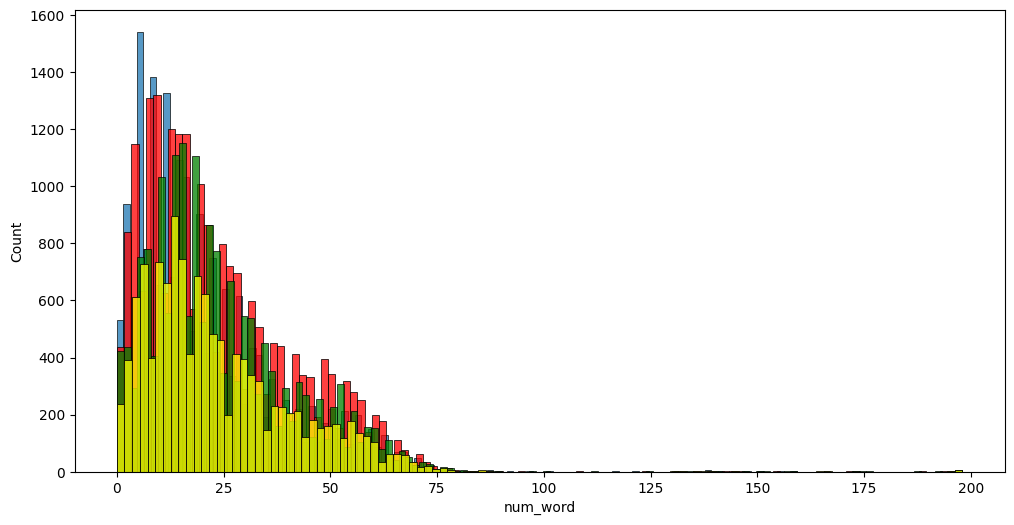

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['sentiment'] == 'Positive']['num_word'])
sns.histplot(train_data[train_data['sentiment'] == 'Negative']['num_word'], color='red')
sns.histplot(train_data[train_data['sentiment'] == 'Neutral']['num_word'], color='green')
sns.histplot(train_data[train_data['sentiment'] == 'Irrelevant']['num_word'], color='yellow')

plt.show()

# **Data Pre-Processing**

In [19]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [20]:
def transform_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove Special Character
    text = re.sub('[^a-zA-Z0-9]+', ' ', text)
    
    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Tokenization
    tokens = word_tokenize(text)

    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    cleaned_text = " ".join(tokens)
    return cleaned_text

In [21]:
text = train_data['description'][2000]
transform_text(text)

'congratul borderland research institut recent grant amount 80 000 pcqc bri dedic studi montezuma quail tran peco region order better understand popul densiti'

In [22]:
train_data['description'] = train_data['description'].apply(transform_text)

# **Word Cloud Technique**

In [23]:
from wordcloud import WordCloud

In [24]:
def draw_wordCloud(data):
    wc = WordCloud(width=450, height=450, min_font_size=10, background_color='white').generate(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.show()

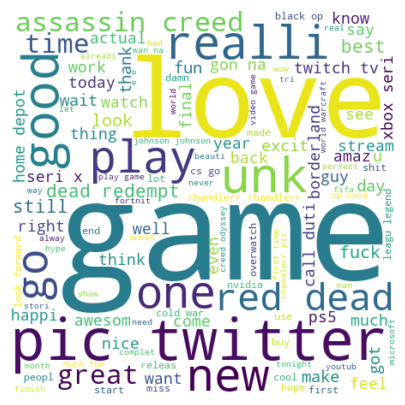

In [25]:
draw_wordCloud(train_data[train_data['sentiment'] == 'Positive']['description'].str.cat(sep=" "))

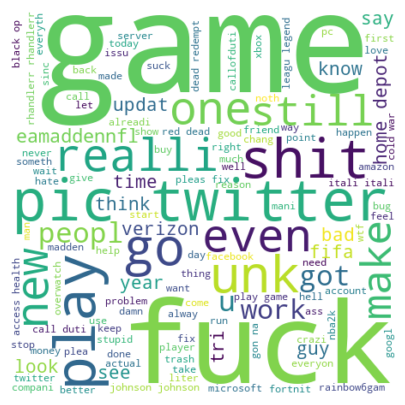

In [26]:
draw_wordCloud(train_data[train_data['sentiment'] == 'Negative']['description'].str.cat(sep=" "))

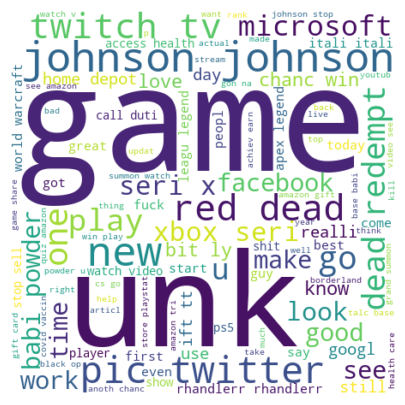

In [27]:
draw_wordCloud(train_data[train_data['sentiment'] == 'Neutral']['description'].str.cat(sep=" "))

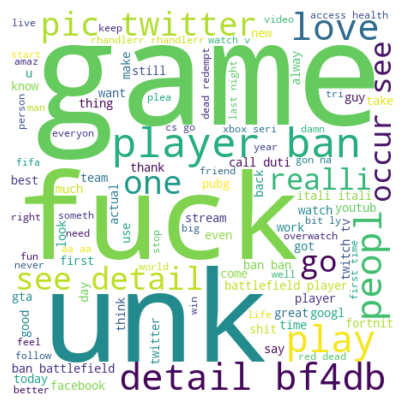

In [28]:
draw_wordCloud(train_data[train_data['sentiment'] == 'Irrelevant']['description'].str.cat(sep=" "))

# **Text Vectorization Technique**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [30]:
tf = TfidfVectorizer()
x = tf.fit_transform(train_data['description'])

In [31]:
y = train_data['sentiment']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# **Model Building**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [34]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
lsvc = LinearSVC()
xgb = XGBClassifier()
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=-1, 
num_leaves=31, subsample=0.8, colsample_bytree=0.8, objective='multiclass', random_state=42)

In [35]:
# clfs = {
#     'knc' : knc,
#     'mnb' : mnb,
#     'dtc' : dtc,
#     'lrc' : lrc,
#     'rfc' : rfc,
#     'abc' : abc,
#     'bc' : bc,
#     'etc' : etc,
#     'gbdt' : gbdt,
#     'lsvc' : lsvc,
# }

In [36]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    # Accuracy
    acc1 = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc1*100:.2f}")

    # Precision
    acc2 = precision_score(y_test, y_pred, average='weighted')
    print(f"Precision: {acc2*100:.2f}")

    # Recall
    acc3 = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall: {acc3*100:.2f}")

    # F1 Score
    acc4 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score: {acc4*100:.2f}")

    print()

In [37]:
# for name, clf in clfs.items():
#     print(name)
#     evaluate_model(clf, x_train, y_train, x_test, y_test)

##### knc => Accuracy: 89.09, Precision: 89.34, Recall: 89.09, F1 Score: 89.10

##### mnb => Accuracy: 71.71, Precision: 75.12, Recall: 71.71, F1 Score: 70.87

##### dtc => Accuracy: 80.52, Precision: 80.66, Recall: 80.52, F1 Score: 80.52

##### lrc => Accuracy: 76.09, Precision: 76.13, Recall: 76.09, F1 Score: 76.00

##### rfc => Accuracy: 91.67, Precision: 91.91, Recall: 91.67, F1 Score: 91.68

##### abc => Accuracy: 37.88, Precision: 54.70, Recall: 37.88, F1 Score: 29.65

##### bc => Accuracy: 84.59, Precision: 84.66, Recall: 84.59, F1 Score: 84.57

##### etc => Accuracy: 93.26, Precision: 93.44, Recall: 93.26, F1 Score: 93.28

##### gbdt => Accuracy: 54.22, Precision: 58.23, Recall: 54.22, F1 Score: 51.60

In [ ]:
etc = ExtraTreesClassifier()
evaluate_model(etc, x_train, y_train, x_test, y_test)

In [ ]:
tf = TfidfVectorizer(
    ngram_range=(1, 3),
    max_features=30000,
    min_df=3,
    max_df=0.85,
    sublinear_tf=True,
    stop_words='english'
)

In [ ]:
x = tf.fit_transform(train_data['description'])
y = train_data['sentiment']

In [ ]:
etc = ExtraTreesClassifier(
    n_estimators=600,          
    max_depth=None,           
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",       
    bootstrap=False,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

In [ ]:
evaluate_model(etc, x_train, y_train, x_test, y_test)